<a href="https://colab.research.google.com/github/alecq26/Data-science-/blob/main/Alec_Quere_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [29]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

This code sets up the softwear we need to filter through the images 

In [30]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [31]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

This is more coding to set up to filter through our images 

In [32]:
url = "https://docs.google.com/presentation/d/1_jKekBcynRj4HdS8jivZmPJhCOBc3kjQcSUPtrcqBCY/edit#slide=id.p"

This url leads to our slide show to where colab will pull the images from

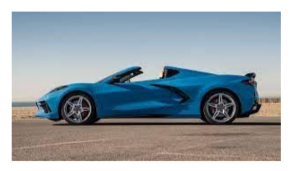

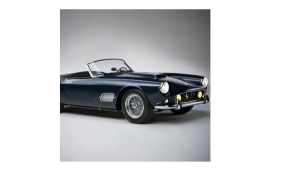

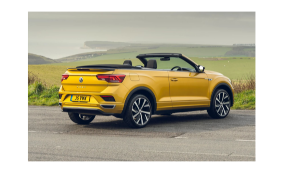

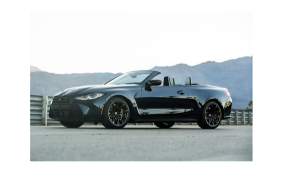

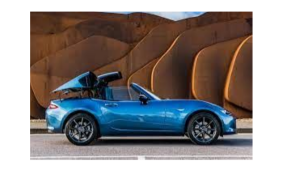

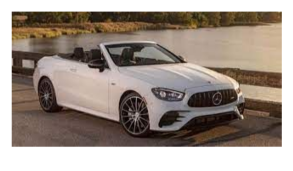

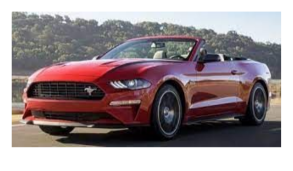

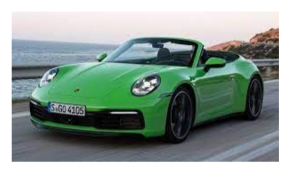

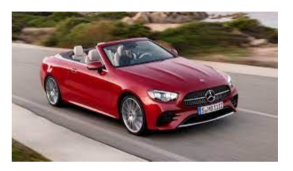

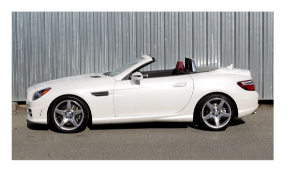

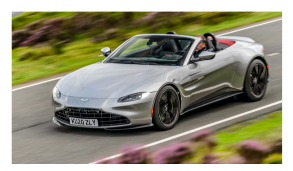

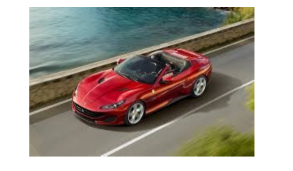

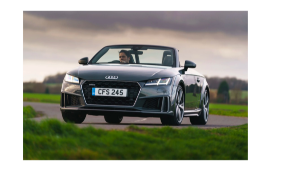

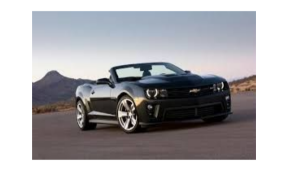

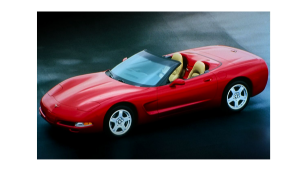

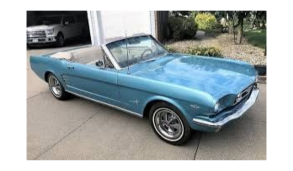

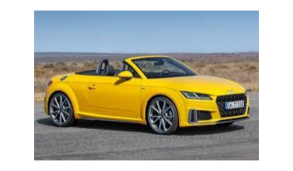

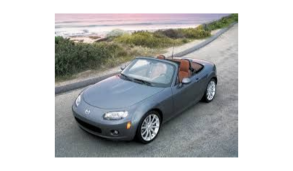

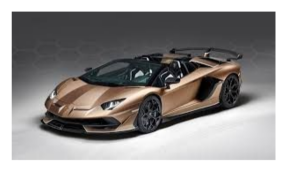

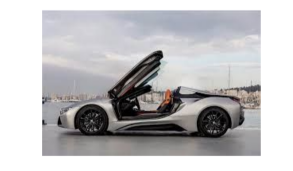

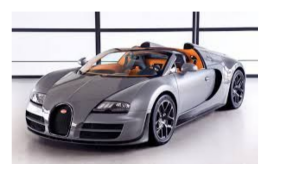

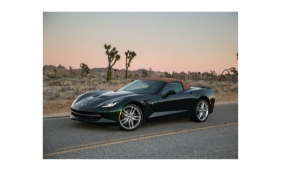

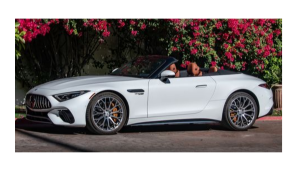

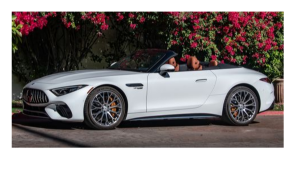

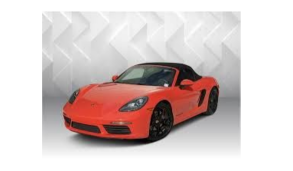

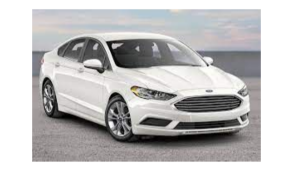

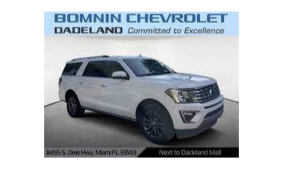

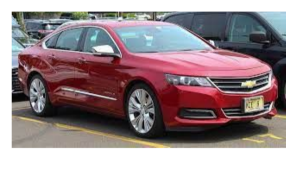

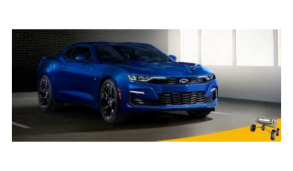

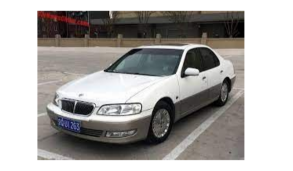

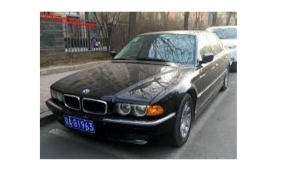

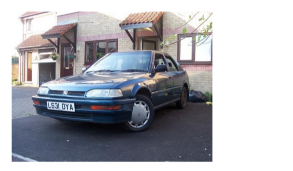

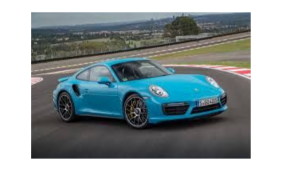

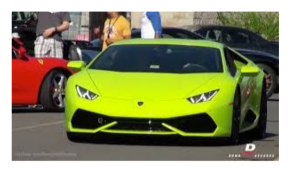

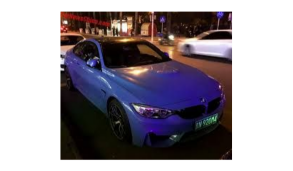

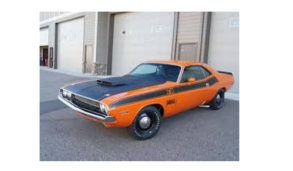

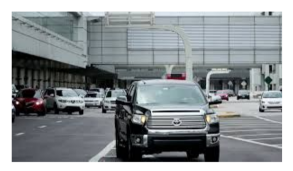

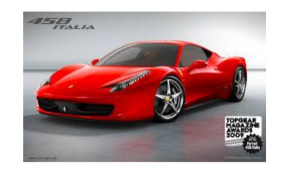

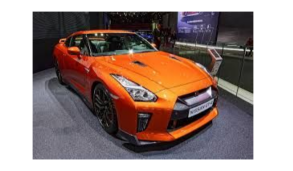

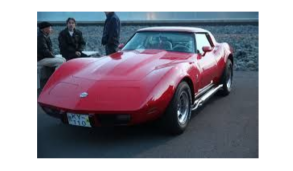

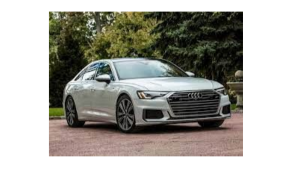

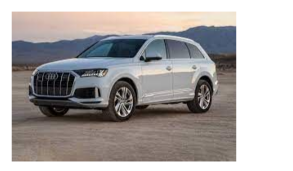

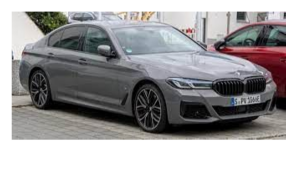

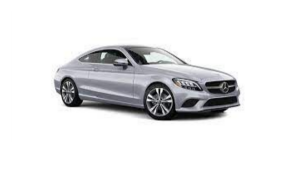

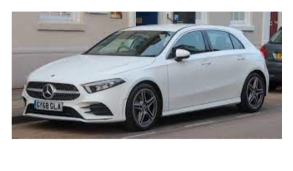

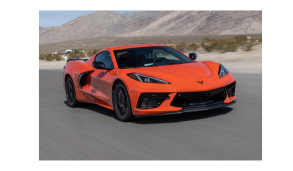

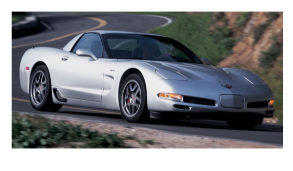

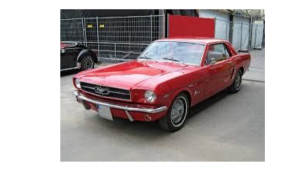

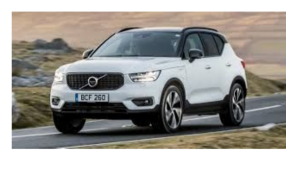

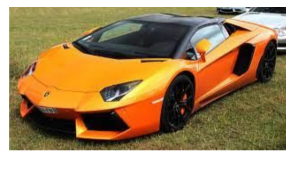

In [33]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

This coding takes the image from the slide show and puts them into colab

In [34]:
images.shape

torch.Size([50, 3, 224, 224])

This code reads the image shapes and sizes 

In [35]:
model(images)

tensor([[-1.7318, -5.6779, -0.7788,  ..., -5.7722, -1.6493, -0.6537],
        [-3.5705, -5.1805, -2.5717,  ..., -7.2407, -0.9905,  1.7693],
        [-4.1923, -5.2919,  0.7840,  ..., -4.1400,  0.2412,  1.7209],
        ...,
        [-3.8491, -5.6454, -0.8009,  ..., -4.1323, -0.0801, -0.2822],
        [-0.5939, -3.9648, -0.0643,  ..., -4.0368, -1.6929,  1.0367],
        [ 0.2082,  0.0696, -1.7685,  ..., -5.3959, -0.6103,  0.9685]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

This code is finding all the different combinations for the code 

In [36]:
y = model(images)

In [37]:
y.shape

torch.Size([50, 1000])

This is finding the shape of the images through the y axis 

In [38]:
guesses = torch.argmax(y, 1).cpu().numpy()

This alows the softwear to sort through the different types of cars 

In [39]:
for i in list(guesses):
    print(labels[i])

convertible
convertible
convertible
convertible
sports car, sport car
convertible
sports car, sport car
sports car, sport car
convertible
convertible
sports car, sport car
convertible
sports car, sport car
convertible
sports car, sport car
convertible
sports car, sport car
minivan
convertible
convertible
convertible
convertible
convertible
convertible
beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon
minivan
sports car, sport car
minivan
racer, race car, racing car
minivan
minivan
convertible
sports car, sport car
sports car, sport car
sports car, sport car
moving van
moving van
sports car, sport car
convertible
sports car, sport car
sports car, sport car
minivan
sports car, sport car
convertible
sports car, sport car
convertible
sports car, sport car
convertible
minivan
sports car, sport car


This alows the softwear to list what it thinks each car is 

In [40]:
Y = np.zeros(50,)
Y[25:] = 1

In [41]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

This gives us an array of each type of car

In [42]:
X = y.detach().cpu().numpy() 

This sets the data up to put it into a dot plot

In [43]:
X.shape

(50, 1000)

This shapes the data for the plot

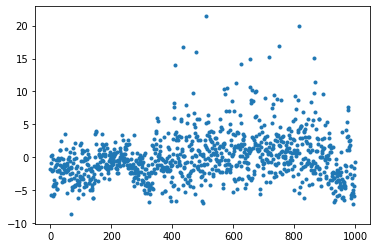

In [44]:
plt.plot(X[0],'.')

In [65]:
X[0]

tensor([-1.7318e+00, -5.6779e+00, -7.7876e-01,  1.9663e-01, -1.9065e+00,
         3.8471e-01, -2.0618e+00, -1.8731e+00, -5.8413e+00, -2.6667e-01,
        -4.2607e+00, -3.4838e+00, -3.9759e+00, -5.5008e+00, -1.5095e+00,
        -4.3422e+00, -3.9507e+00, -4.5996e-01, -1.2065e+00, -3.8879e+00,
        -4.7676e+00, -1.9783e+00, -4.7228e+00, -1.0339e+00, -8.6948e-02,
        -3.3772e-01, -2.0721e+00, -1.8304e+00, -3.4333e-01, -2.1269e+00,
        -1.1103e+00, -2.9471e+00,  1.0649e+00,  1.1427e+00,  2.4927e+00,
        -2.3064e+00, -1.0521e-01, -3.6504e+00, -1.2756e+00, -1.4202e+00,
        -3.3091e+00, -2.2928e+00, -2.3057e-01, -1.7818e+00, -3.5538e+00,
        -1.0553e+00, -3.2793e+00,  3.6263e+00, -1.2376e+00, -1.8347e+00,
        -2.2447e+00,  1.2124e+00, -1.1711e+00, -1.0935e+00, -8.6885e-01,
        -5.3331e+00, -2.0167e+00, -1.7168e+00, -1.9094e+00, -2.6623e-01,
        -1.5249e+00, -3.4136e+00,  1.3819e-01, -5.2692e-01, -2.5589e+00,
         7.9016e-01, -1.5767e+00, -3.2997e+00, -1.5

These are all the numbers we get from the data

In [46]:
np.argmax(X[0])

511

This is the number it thinks the one we're trying to seperate is at

In [47]:
labels[948]

'Granny Smith'

In [48]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [49]:
for i in top_ten:
    print(labels[i])

convertible
sports car, sport car
racer, race car, racing car
beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon
car wheel
pickup, pickup truck
tow truck, tow car, wrecker
minivan
limousine, limo
amphibian, amphibious vehicle


This prints out all the different types of things the computer thinks there are in this case cars 

In [50]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 24., 189., 401., 259.,  79.,  25.,  13.,   5.,   3.,   2.]),
 array([-8.557551  , -5.56127   , -2.564989  ,  0.43129206,  3.4275732 ,
         6.4238544 ,  9.4201355 , 12.416416  , 15.412698  , 18.40898   ,
        21.40526   ], dtype=float32),
 <a list of 10 Patch objects>)

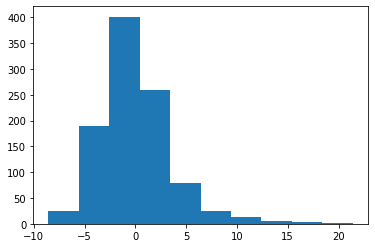

In [51]:
plt.hist(X[0])

This is a bar graph of all the different types of cars

In [52]:
X = GPU_data(X)
Y = GPU_data(Y)

This takes the data from x and y and prepares to figure out what they are

In [53]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

This sets the softwear up to run the code

In [54]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [55]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [56]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

This figures out the size out the images and what it could posibly be

In [57]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [58]:
X.shape

torch.Size([50, 1000])

In [59]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

This figures out the mode to get a average percent of correctness 

In [60]:
def model(x,w):

    return x@w[0]

In [61]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

This makes a plot on the accuracy 

In [64]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


acc_train,▃▁▁▆▅▆▆▆█▆▆▆█▆▅▃█▆▆▆█▆▆▅▅▆▆▆▆▆▅▆▆██▆▅▅▆▆
loss,▆██▃▄▃▃▃▁▃▃▃▁▃▄▆▁▃▃▃▁▃▃▄▄▃▃▃▃▃▄▃▃▁▁▃▄▄▃▃
acc_train,0.875
loss,0.43826


<ipython-input-30-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

My lowest run was .8125 and my highest run was .875. The average of the three is .854167